# Mounting Google Drive and Loading Data

In [1]:
# Mounting your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [93]:
import pandas as pd

# Import your training and validation data
# Replace 'path_to_data' with the actual path of your data in Google Drive

# Corrected path to my data
data_path = '/content/drive/MyDrive/DummyOrdner'
training_features = pd.read_csv(f'{data_path}/features_train_regen.csv').drop('RegenTRUE', axis = 1)
training_labels = pd.read_csv(f'{data_path}/label_train_regen.csv')
validation_features = pd.read_csv(f'{data_path}/features_validation_regen.csv').drop('RegenTRUE', axis = 1)
validation_labels = pd.read_csv(f'{data_path}/label_validation_regen.csv')
test_feature = pd.read_csv(f'{data_path}/features_test_regen.csv').drop('RegenTRUE', axis = 1)
test_idsss = pd.read_csv(f'{data_path}/test_data_IDs_regen.csv')

In [101]:
combined_features = training_features.append(validation_features, ignore_index = True)
combined_labels = training_labels.append(validation_labels, ignore_index = True)


<ipython-input-101-50b063842739>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_features = training_features.append(validation_features, ignore_index = True)
<ipython-input-101-50b063842739>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_labels = training_labels.append(validation_labels, ignore_index = True)


In [71]:
print(validation_features.shape)
print(training_features.shape)

(1040, 25)
(8294, 25)


# Defining the Neural Network

Now, let's define our neural network. We are using a Sequential model definition from Keras with batch normalization and dense layers.

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dense, Dropout

model = Sequential([
    InputLayer(input_shape=(training_features.shape[1], )),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.1),  # Adding dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1)
])


In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dense, Dropout

model = Sequential([
    InputLayer(input_shape=(training_features.shape[1], )),
    BatchNormalization(),
    Dense(10, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1)
])

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dense, Dropout

model = Sequential([
    InputLayer(input_shape=(training_features.shape[1], )),
    BatchNormalization(),
    Dense(63, activation='relu'),
    Dropout(0.2),
    Dense(20, activation='relu'),
    Dense(1)
])

# Compiling and Training the Model

We will compile the model using Mean Squared Error (MSE) as the loss function and Adam optimizer. The model is then trained using the training data

In [127]:

model.compile(loss='mae', optimizer='adam',metrics=['mape'])
history = model.fit(combined_features, combined_labels, epochs=30,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
292/292 [==============================] - 5s 8ms/step - loss: 89.9691 - mape: 47.9920 - val_loss: 44.1177 - val_mape: 26.4301
Epoch 2/30
292/292 [==============================] - 2s 6ms/step - loss: 50.3724 - mape: 29.3456 - val_loss: 40.4825 - val_mape: 23.1734
Epoch 3/30
292/292 [==============================] - 1s 5ms/step - loss: 49.9511 - mape: 27.9277 - val_loss: 40.2696 - val_mape: 24.5372
Epoch 4/30
292/292 [==============================] - 1s 5ms/step - loss: 48.7907 - mape: 27.2509 - val_loss: 37.2601 - val_mape: 22.6223
Epoch 5/30
292/292 [==============================] - 1s 5ms/step - loss: 47.4950 - mape: 26.4357 - val_loss: 35.0724 - val_mape: 20.7081
Epoch 6/30
292/292 [==============================] - 1s 5ms/step - loss: 45.8119 - mape: 24.8798 - val_loss: 34.5389 - val_mape: 20.1332
Epoch 7/30
292/292 [==============================] - 1s 5ms/step - loss: 45.3581 - mape: 24.8443 - val_loss: 33.7212 - val_mape: 18.6204
Epoch 8/30
292/292 [==============

# Saving the Trained Model

# Plotting Training History

Visualizing the training and validation loss can help us understand the model's performance over time.

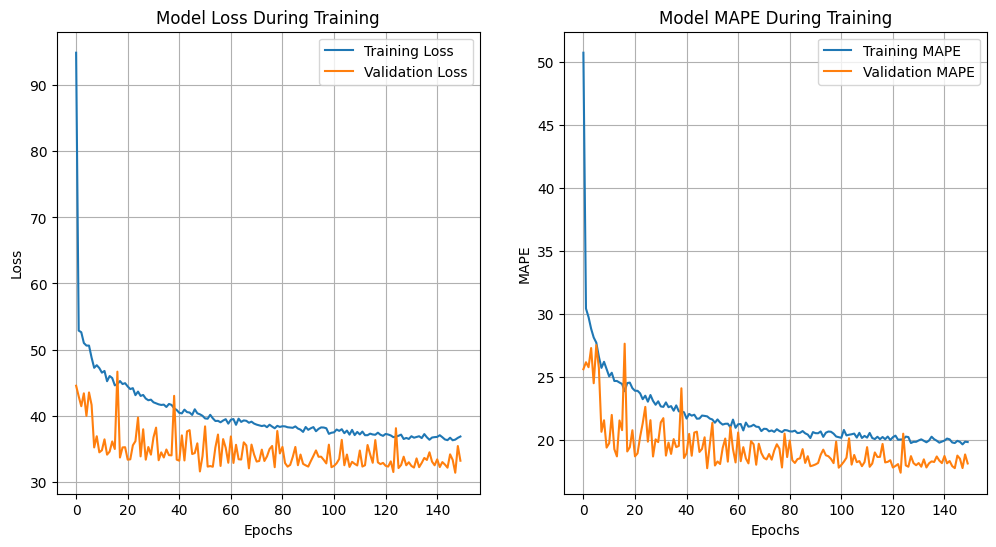

In [98]:
import matplotlib.pyplot as plt

# Assuming you have history object from model.fit() which includes accuracy and loss
# history = model.fit(...)

plt.figure(figsize=(12, 6))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.grid()

plt.ylabel('Loss')
plt.legend()

# Plot Training MAPE
plt.subplot(1, 2, 2)
plt.plot(history.history['mape'], label='Training MAPE')
plt.plot(history.history['val_mape'], label='Validation MAPE')
plt.title('Model MAPE During Training')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.grid()
plt.legend()

plt.show()


# Making Predictions and Evaluating the Model

Let's use the model to make predictions on our training and validation sets and evaluate the model's performance using Mean Absolute Percentage Error (MAPE).

In [129]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
training_predictions
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")

33/33 [==============================] - 0s 3ms/step
MAPE on the Training Data: 22.35%
MAPE on the Validation Data: 22.87%


# Visualizing Predictions vs Actual Values

Visualizing the predicted versus actual values can provide insights into the model's accuracy

# Example of a Prediction and Export of Test Data for Kaggle

Finally, for testing data on Kaggle you have to do a prediction for the test data and format it in the format needed by Kaggle.

The code below provides an example that you can use

In [115]:
# Extract IDs and prepare test features
test_ids = test_idsss['id']

# Make predictions
test_predictions = model.predict(test_feature)

# Create a DataFrame for submission
predictions_df = pd.DataFrame({
    'id': test_ids,
    'Umsatz': test_predictions.flatten()  # Replace column name with the one given in sample_submission.csv
})

# Export to CSV
predictions_df.to_csv('kaggle_submission_basic.csv', index=False)

58/58 [==============================] - 0s 3ms/step


Mape for each category

In [102]:
baum = {'1': 'Brötchen',
        '2': 'Brot',
        '3': 'Croissant',
        '4': 'Konditorei',
        '5': 'Kuchen',
        '6': 'Saisonbrot'}

def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    mask = actual != 0  # Avoid division by zero
    return np.mean(np.abs((actual - predicted) / actual)[mask]) * 100


mask_last = np.zeros(validation_features.shape[0])
for i in range(2,7):
  mask = validation_features[f'Warengruppe{i}'].astype(bool)
  mask_last = np.logical_or(mask_last, mask)
  df_features = validation_features[mask]
  df_labels = validation_labels[mask]
  if i != 6:
    predicted_df_labels = model.predict(df_features)
    print('Produkt', baum[str(i)])
    print(f'MAPE: {calculate_mape(df_labels, predicted_df_labels)}\n')
  else:
    print('Produkt', baum[str(i)])
    print('Keine Datenpunkte verfügbar \n')

# last one
df_features = validation_features[~mask_last]
df_labels = validation_labels[~mask_last]
predicted_df_labels = model.predict(df_features)
print('Produkt', baum[str(1)])
print(f'MAPE: {calculate_mape(df_labels, predicted_df_labels)}\n')


7/7 [==============================] - 0s 3ms/step
Produkt Brot
MAPE: 13.895201879655508

7/7 [==============================] - 0s 3ms/step
Produkt Croissant
MAPE: 18.418234464020482

7/7 [==============================] - 0s 3ms/step
Produkt Konditorei
MAPE: 22.378984305998927

7/7 [==============================] - 0s 3ms/step
Produkt Kuchen
MAPE: 14.468290425136004

Produkt Saisonbrot
Keine Datenpunkte verfügbar 

7/7 [==============================] - 0s 3ms/step
Produkt Brötchen
MAPE: 21.61983219177194

